In [ ]:
# HW2
# Problem 1 (Impact of different activation functions and optimization on learning)

In [ ]:
'''
(a) what is the exact number of parameters we are trying to learn?
(b) use different activation functions in your architecture 
(e.g. sigmoid for 1st layer, tanh for 2nd layer, sigmoid for 3rd layer, reLU for 4th layer, and leaky reLu for 5th layer) 
and assess its impact on accuracy?
(c) for part (b) keep the same architecture, just use different optimization routine and assess its impact on accuracy?

'''

# Imports

In [1]:
import tensorflow as tf
import time

import numpy as np # linear algebra
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

#load MNIST dataset 
mnist = input_data.read_data_sets("data/", one_hot=True)


/Users/liyingellie/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


# Parameters

In [2]:
# Global Parameters
#--------------------------------
# learning rate
learning_rate = 0.05

#training_epochs = 1000
#batch_size = 30

training_epochs = 100
batch_size = 50

display_step = 2

#Network Architecture
# -----------------------------------------
#
# Two hidden layers
#
#------------------------------------------
# number of neurons in layer 1
n_hidden_1 = 400
# number of neurons in layer 2
n_hidden_2 = 200
# number of neurons in layer 3
n_hidden_3 = 100
# number of neurons in layer 4
n_hidden_4 = 50
# number of neurons in layer 5
n_hidden_5 = 25

#MNIST data image of shape 28*28=784
input_size = 784

# 0-9 digits recognition (labels)
output_size = 10

In [4]:
def layer(x, weight_shape, bias_shape, name):
    """
    Defines the network layers
    input:
        - x: input vector of the layer
        - weight_shape: shape the the weight maxtrix
        - bias_shape: shape of the bias vector
    output:
        - output vector of the layer after the matrix multiplication and non linear transformation
    """
    
    # comes from the study by He et al. for ReLU layers
    w_std = (2.0/weight_shape[0])**0.5
    #print(weight_shape[0])
    #w_std = 0.5;

    #initialization of the weights
    #you can try either
    w_0 = tf.random_normal_initializer(stddev=w_std)
    #w_0 = tf.random_uniform_initializer(minval=-1,maxval=1)

    b_0 = tf.constant_initializer(value=0)
    
    W = tf.get_variable("W", weight_shape, initializer=w_0)
    b = tf.get_variable("b", bias_shape,   initializer=b_0)
    
    print('Weight Matrix:', W)
    print('Bias Vector:', b)
    
    if name == 'linear':
        return tf.matmul(x, W) + b
    elif name == 'tanh':
        return tf.nn.tanh(tf.matmul(x, W) + b)
    elif name == 'sigmoid':
        return tf.nn.sigmoid(tf.matmul(x, W) + b)
    elif name == 'ReLU':
        return tf.nn.relu(tf.matmul(x, W) + b)
        
        
    # different activation functions
    # you can try
    # (1) linear activation (not a good idea)
    #return tf.matmul(x, W) + b
    # (2) tanh activation
    #return tf.nn.tanh(tf.matmul(x, W) + b)
    # (3) sigmoid activation
    #return tf.nn.sigmoid(tf.matmul(x, W) + b)
    # (4) relu activation
    # return tf.nn.relu(tf.matmul(x, W) + b)


# Define Layer Function

In [3]:
def layer(x, weight_shape, bias_shape, name):
    """
    Defines the network layers
    input:
        - x: input vector of the layer
        - weight_shape: shape the the weight maxtrix
        - bias_shape: shape of the bias vector
    output:
        - output vector of the layer after the matrix multiplication and non linear transformation
    """
    
    # comes from the study by He et al. for ReLU layers
    w_std = (2.0/weight_shape[0])**0.5
    #print(weight_shape[0])
    #w_std = 0.5;

    #initialization of the weights
    #you can try either
    w_0 = tf.random_normal_initializer(stddev=w_std)
    #w_0 = tf.random_uniform_initializer(minval=-1,maxval=1)

    b_0 = tf.constant_initializer(value=0)
    
    W = tf.get_variable("W", weight_shape, initializer=w_0)
    b = tf.get_variable("b", bias_shape,   initializer=b_0)
    
    print('Weight Matrix:', W)
    print('Bias Vector:', b)
    
    if name == 'linear':
        return tf.matmul(x, W) + b
    elif name == 'tanh':
        return tf.nn.tanh(tf.matmul(x, W) + b)
    elif name == 'sigmoid':
        return tf.nn.sigmoid(tf.matmul(x, W) + b)
    elif name == 'leakyReLU':
        return tf.nn.leaky_relu(tf.matmul(x, W) + b)
    elif name == 'ReLU':
        return tf.nn.relu(tf.matmul(x, W) + b)
        
        
    # different activation functions
    # you can try
    # (1) linear activation (not a good idea)
    #return tf.matmul(x, W) + b
    # (2) tanh activation
    #return tf.nn.tanh(tf.matmul(x, W) + b)
    # (3) sigmoid activation
    #return tf.nn.sigmoid(tf.matmul(x, W) + b)
    # (4) relu activation
    else:
        return tf.nn.relu(tf.matmul(x, W) + b)


# Define Inference Function

In [4]:
def inference(x):
    """
    define the whole network (5 hidden layers + output layers)
    input:
        - a batch of pictures 
        (input shape = (batch_size*image_size))
    output:
        - a batch vector corresponding to the logits predicted by the network
        (output shape = (batch_size*output_size)) 
    """
    
    with tf.variable_scope("hidden_layer_1"):
        hidden_1 = layer(x, [input_size, n_hidden_1], [n_hidden_1],'sigmoid')
        #print([input_size, n_hidden_1])
     
    with tf.variable_scope("hidden_layer_2"):
        hidden_2 = layer(hidden_1, [n_hidden_1, n_hidden_2], [n_hidden_2],'tanh')
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_3"):
        hidden_3 = layer(hidden_2, [n_hidden_2, n_hidden_3], [n_hidden_3],'sigmoid')
        #print([n_hidden_2, n_hidden_3])
        
    with tf.variable_scope("hidden_layer_4"):
        hidden_4 = layer(hidden_3, [n_hidden_3, n_hidden_4], [n_hidden_4],'ReLU')
        #print([n_hidden_3, n_hidden_4])
        
    with tf.variable_scope("hidden_layer_5"):
        hidden_5 = layer(hidden_4, [n_hidden_4, n_hidden_5], [n_hidden_5],'leakyReLU')
        #print([n_hidden_4, n_hidden_5])
     
    with tf.variable_scope("output"):
        output = layer(hidden_5, [n_hidden_5, output_size], [output_size], name=None)
        #print([n_hidden_5, output_size])

    return output

# Define Loss Function

## Define First Loss 

In [7]:
def loss_1(output, y):
    """
    computes the average error per data sample 
    by computing the cross-entropy loss over a minibatch
    intput:
        - output: the output of the inference function 
        - y: true value of the sample batch
        
        the two have the same shape (batch_size * num_of_classes)
    output:
        - loss: loss of the corresponding batch (scalar tensor)
    
    """
    dot_product = y * tf.log(output)
    
    #tf.reduce_sum: Computes the sum of elements across dimensions of a tensor.
    xentropy = -tf.reduce_sum(dot_product, 1)
    
    #tf.reduce_mean: Computes the mean of elements across dimensions of a tensor.
    loss = tf.reduce_mean(xentropy)

    return loss

## Define Second Loss

In [8]:
def loss_2(output, y):
    """
    Computes softmax cross entropy between logits and labels and then the loss 
    
    intput:
        - output: the output of the inference function 
        - y: true value of the sample batch
        
        the two have the same shape (batch_size * num_of_classes)
    output:
        - loss: loss of the corresponding batch (scalar tensor)
    
    """

    #mean square error
    #loss = tf.reduce_mean(tf.reduce_sum(tf.square(y-output)))
    
    #Computes softmax cross entropy between logits and labels.
    xentropy = tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=y)
    loss = tf.reduce_mean(xentropy)

    return loss

# Define the optimizer and training target

In [9]:
def training(cost, global_step):
    """
    defines the necessary elements to train the network
    
    intput:
        - cost: the cost is the loss of the corresponding batch
        - global_step: number of batch seen so far, it is incremented by one 
        each time the .minimize() function is called
    """

    tf.summary.scalar("cost", cost)
    # tf.train.GradientDescentOptimizer
    # will use different optimization routimes 
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train_op = optimizer.minimize(cost, global_step=global_step)

    return train_op

In [13]:
def training2(cost, global_step):
    """
    defines the necessary elements to train the network
    
    intput:
        - cost: the cost is the loss of the corresponding batch
        - global_step: number of batch seen so far, it is incremented by one 
        each time the .minimize() function is called
    """

    tf.summary.scalar("cost", cost)
    # tf.train.GradientDescentOptimizer
    # will use different optimization routimes 
    optimizer = tf.train.AdamOptimizer(learning_rate)
    train_op = optimizer.minimize(cost, global_step=global_step)

    return train_op

# Define evaluation method

In [10]:
def evaluate(output, y):
    """
    evaluates the accuracy on the validation set 
    input:
        -output: prediction vector of the network for the validation set
        -y: true value for the validation set
    output:
        - accuracy: accuracy on the validation set (scalar between 0 and 1)
    """
    #correct prediction is a binary vector which equals one when the output and y match
    #otherwise the vector equals 0
    #tf.cast: change the type of a tensor into another one
    #then, by taking the mean of the tensor, we directly have the average score, so the accuracy
    
    correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(y, 1))
    
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    tf.summary.scalar("validation_error", (1.0 - accuracy))

    return accuracy

# Main function

Weight Matrix: <tf.Variable 'multi_5_layer/hidden_layer_1/W:0' shape=(784, 400) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_5_layer/hidden_layer_1/b:0' shape=(400,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_5_layer/hidden_layer_2/W:0' shape=(400, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_5_layer/hidden_layer_2/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_5_layer/hidden_layer_3/W:0' shape=(200, 100) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_5_layer/hidden_layer_3/b:0' shape=(100,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_5_layer/hidden_layer_4/W:0' shape=(100, 50) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_5_layer/hidden_layer_4/b:0' shape=(50,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_5_layer/hidden_layer_5/W:0' shape=(50, 25) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_5_layer/hidden_layer_5/b:0' shape=(25,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_5_layer/ou

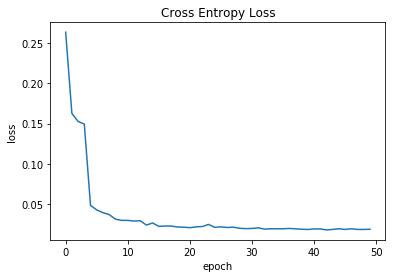

In [16]:
if __name__ == '__main__':
    
    start_time = time.time()
    #please, make sure you changed for your own path 
    log_files_path = 'C:/Users/Ali/logs/'

    with tf.Graph().as_default():
        
        with tf.variable_scope("multi_5_layer"):
            #neural network definition 
            
            #the input variables are first define as placeholder 
            # a placeholder is a variable/data which will be assigned later 
            # image vector & label
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition

            #the network is defined using the inference function defined above in the code
            output = inference(x)
            #calculate loss with tensorflow's cross-entropy function
            cost = loss_2(output, y)
            
            #initialize the value of the global_step variable 
            # recall: it is incremented by one each time the .minimise() is called
            global_step = tf.Variable(0, name='global_step', trainable=False)
            
            train_op = training(cost, global_step)
            #train_op = training(cost, global_step=None)
            
            #evaluate the accuracy of the network (done on a validation set)
            eval_op = evaluate(output, y)

            summary_op = tf.summary.merge_all()
    
            #save and restore variables to and from checkpoints.
            saver = tf.train.Saver()
    
            #defines a session
            sess = tf.Session()
            
            # summary writer
            #https://www.tensorflow.org/api_docs/python/tf/summary/FileWriter
            #
            summary_writer = tf.summary.FileWriter(log_files_path+'multi_5_layer/', sess.graph)
        
            #initialization of all the variables
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            #will work with this later
            #saver.restore(sess, log_files_path+'multi_layer/model-checkpoint-66000')
            
            loss_trace = []

            # Training cycle
            for epoch in range(training_epochs):

                avg_cost = 0.
                total_batch = int(mnist.train.num_examples/batch_size)
            
                # Loop over all batches
                for i in range(total_batch):

                    minibatch_x, minibatch_y = mnist.train.next_batch(batch_size)
                    # Fit training using batch data
                    #the training is done using the training dataset
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    # Compute average loss of all batches
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                # Display logs per epoch step
                if epoch % display_step == 0:
                    
                    #the accuracy is evaluated using the validation dataset
                    accuracy = sess.run(eval_op, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
                    loss_trace.append(1-accuracy)    
                    print("Epoch:", '%03d' % (epoch+1), "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                        
                    #save to use later
                    #https://www.tensorflow.org/api_docs/python/tf/train/Saver
                    #saver.save(sess, log_files_path+'model-checkpoint', global_step=global_step)
                    saver.save(sess, log_files_path+'multi_5_layer/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            #accuracy evaluated with the whole test dataset
            accuracy = sess.run(eval_op, feed_dict={x: mnist.test.images, y: mnist.test.labels})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            
            # Visualization of the results
            # loss function
            plt.plot(loss_trace)
            plt.title('Cross Entropy Loss')
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.show()

In [ ]:
'''
(c) for part (b) keep the same architecture, just use different optimization routine and assess its impact on accuracy?

using Adam in this case
'''

Weight Matrix: <tf.Variable 'multi_5_layer/hidden_layer_1/W:0' shape=(784, 400) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_5_layer/hidden_layer_1/b:0' shape=(400,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_5_layer/hidden_layer_2/W:0' shape=(400, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_5_layer/hidden_layer_2/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_5_layer/hidden_layer_3/W:0' shape=(200, 100) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_5_layer/hidden_layer_3/b:0' shape=(100,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_5_layer/hidden_layer_4/W:0' shape=(100, 50) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_5_layer/hidden_layer_4/b:0' shape=(50,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_5_layer/hidden_layer_5/W:0' shape=(50, 25) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_5_layer/hidden_layer_5/b:0' shape=(25,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_5_layer/ou

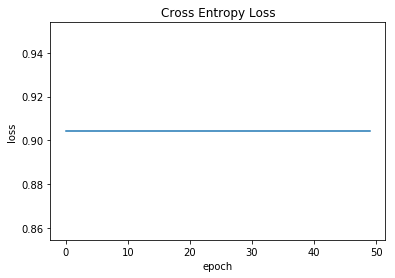

In [15]:
if __name__ == '__main__':
    
    start_time = time.time()
    #please, make sure you changed for your own path 
    log_files_path = '/Users/liyingellie/Downloads'

    with tf.Graph().as_default():
        
        with tf.variable_scope("multi_5_layer"):
            #neural network definition 
            
            #the input variables are first define as placeholder 
            # a placeholder is a variable/data which will be assigned later 
            # image vector & label
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition

            #the network is defined using the inference function defined above in the code
            output = inference(x)
            #calculate loss with tensorflow's cross-entropy function
            cost = loss_2(output, y)
            
            #initialize the value of the global_step variable 
            # recall: it is incremented by one each time the .minimise() is called
            global_step = tf.Variable(0, name='global_step', trainable=False)
            
            train_op = training2(cost, global_step)
            #train_op = training(cost, global_step=None)
            
            #evaluate the accuracy of the network (done on a validation set)
            eval_op = evaluate(output, y)

            summary_op = tf.summary.merge_all()
    
            #save and restore variables to and from checkpoints.
            saver = tf.train.Saver()
    
            #defines a session
            sess = tf.Session()
            
            # summary writer
            #https://www.tensorflow.org/api_docs/python/tf/summary/FileWriter
            #
            summary_writer = tf.summary.FileWriter(log_files_path+'multi_5_layer/', sess.graph)
        
            #initialization of all the variables
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            #will work with this later
            #saver.restore(sess, log_files_path+'multi_layer/model-checkpoint-66000')
            
            loss_trace = []

            # Training cycle
            for epoch in range(training_epochs):

                avg_cost = 0.
                total_batch = int(mnist.train.num_examples/batch_size)
            
                # Loop over all batches
                for i in range(total_batch):

                    minibatch_x, minibatch_y = mnist.train.next_batch(batch_size)
                    # Fit training using batch data
                    #the training is done using the training dataset
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    # Compute average loss of all batches
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                # Display logs per epoch step
                if epoch % display_step == 0:
                    
                    #the accuracy is evaluated using the validation dataset
                    accuracy = sess.run(eval_op, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
                    loss_trace.append(1-accuracy)    
                    print("Epoch:", '%03d' % (epoch+1), "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                        
                    #save to use later
                    #https://www.tensorflow.org/api_docs/python/tf/train/Saver
                    #saver.save(sess, log_files_path+'model-checkpoint', global_step=global_step)
                    saver.save(sess, log_files_path+'multi_5_layer/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            #accuracy evaluated with the whole test dataset
            accuracy = sess.run(eval_op, feed_dict={x: mnist.test.images, y: mnist.test.labels})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            
            # Visualization of the results
            # loss function
            
            plt.plot(loss_trace)
            plt.title('Cross Entropy Loss')
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.show()
            #

In [ ]:
'''
Problem 2 (visualization of the lost function ): Use sample code example 5 layer interpolation.jpynb and architecture and opti-
mization routine in parts (b) & (c) of Problem 1 to assess the loss function by interpolation, namely
(a) impact of different architecture on the loss function surface
(b) assessing the path traveled through the loss function having same architecture but using different optimization routine
'''